# Projet apprentissage

### Importation des différents modules :

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Informations sur le dataset
Le jeu de données choisi est **Pima Indians Diabetes Database** consultable à l'adresse https://www.kaggle.com/uciml/pima-indians-diabetes-database <br>
Ce dataset contient des données sur les Pimas, qui est un peuple Indien d'Amérique du Nord. Cette communauté est connue pour ses problèmes d'obésité et de diabète. Les données recueillies ici sont toutes issues de femmes d'au moins 21 ans. <br>
L'objectif est de réussir à prédire si une personne sera diabétique ou non à partir des variables suivantes :
- **Pregnancies** : Nombre de fois enceinte
- **Glucose** : Concentration de glycémie 
- **BloodPressure** : Pression sanguine diastolique (mm Hg)
- **SkinThickness** : Epaisseur du pli cutané au niveau du triceps (mm)
- **Insulin** : Taux d'insulin ($\mu$U/mL)
- **BMI** : Indice de Masse Corporelle
- **DiabetesPedigreeFunction** : Score évaluant la probabilité d'être diabétique selon l'historique familial 
- **Age** : Age (années)
- **Outcome** : Variable binaire, vaut 1 si la personne est diabétique et 0 sinon

### Importation du jeu de données

In [2]:
data = pd.read_csv('pima_indians_diabetes.csv')

In [3]:
data.head() # Affiche les premières observations

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape # Dimensions

(768, 9)

On peut également observer quelques informations sur les colonnes du dataframe

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


On vérifie la présence de valeurs manquantes dans le jeu de données

In [6]:
data.isnull().sum() # Vérification des valeurs manquantes

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Quelques statistiques descriptives et graphiques

On peut observer des statistiques descriptives pour chacune des variables

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Histogramme pour la variable Outcome**

Un premier graphique nous permet de visualiser le nombre de fois où *Outcome = 0* et *Outcome = 1*.

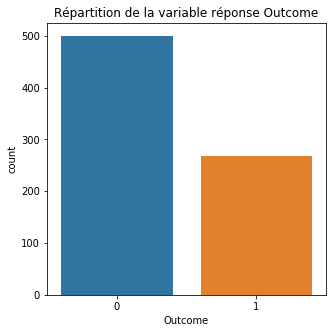

In [8]:
plt.figure(figsize=(5,5))
sns.countplot(data['Outcome'])
plt.title('Répartition de la variable réponse Outcome')
plt.show()

**Histogrammes des colonnes du dataframe**

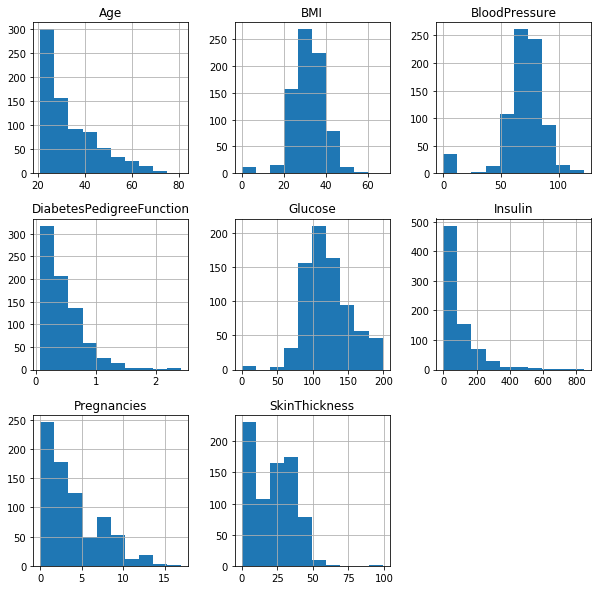

In [9]:
data_no_outcome = data.loc[:, data.columns != 'Outcome'] # Toutes les colonnes sauf Outcome
data_no_outcome.hist(figsize=(10,10))
plt.show()

Ces différents histogrammes nous renseignent sur la façon dont les données sont réparties. On remarque par exemple qu'environ 300 observations dans le jeu de données correspondent à des personnes âgées de 21 ans, et environ 250 n'ont jamais été enceintes. 

Cependant, on peut aussi constater que la présence de 0 pour certaines variables comme *BMI* ou encore *BloodPressure* n'est pas normale. On pourrait éventuellement considérer cela comme des valeurs manquantes et les imputer en prenant la moyenne ou en les retirant, mais nous n'allons pas le faire ici. Il faudra en tenir compte pour les performances des différents modèles.

### Séparation du jeu d'apprentissage et jeu test
Il faut maintenant séparer le dataset en deux jeux de données. Les proportions sont telles que 2/3 des observations vont dans le jeu d'entrainement et 1/3 des données dans le jeu test. <br>
La fonction *train_test_split( )* prend par défaut l'argument *Shuffle* = $\color{green}{True}$ qui permet de mélanger les données avant de les séparer.

In [10]:
y = data['Outcome'] # Création de la variable réponse
X = data.drop(['Outcome'], axis=1) # Retire la colonne Outcome

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=2/3, test_size=1/3, random_state=0)

In [12]:
print(X_train.shape)
print(X_test.shape)

(512, 8)
(256, 8)


## Apprentissage des modèles

Pour savoir quels modèles nous allons utiliser, il faut regarder le problème que nous cherchons à résoudre. <br>
Ici, c'est un problème de classification, et la variable que l'on souhaite prédire est *Outcome*, qui est une variable binaire, $Y \in \{0,1\}$. <br>
De ce fait, les modèles que l'on va utiliser sont : 
- La régression logistique
- Arbre de décision
- Random Forest
- k-Nearest Neighbors (k-NN)
- Support Vector Machine

Dans un premier temps, les modèles sont appliquées avec les paramètres de base, c'est-à-dire que ce sont des paramètres choisis par défaut, par Scikit-learn.

### Régression Logistique

La régression logistique est un modèle linéaire généralisé qui est utilisé lorsque la variable réponse est binaire. C'est un modèle très répandu en biologie mais également en Machine Learning.

In [13]:
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression(max_iter=500, random_state=0)
model_LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Arbre de décision

L'arbre de décision est une méthode qui, comme son nom l'indique, va créer un arbre permettant de classer les observations. Pour cela, l'arbre va mettre en place différents critères (correspondant à des noeuds) auxquels les observations vont être soumises. En bas de l'arbre, on retrouve les "feuilles" qui sont les résultats possibles.

Ces arbres sont très pratiques car ils ont une grande interprétabilité. Cependant, la difficulté résulte dans la taille de l'arbre afin d'éviter le sur-apprentissage.

In [14]:
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier(random_state=0)
model_DT.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

### Random Forest

Random Forest est un modèle essayant de pallier à l'inconvénient des Arbres de décision. Le principe consiste à générer un ensemble d'arbre de décision différents, et de regarder les prédictions faites par la majorité des arbres dans la forêt.

In [15]:
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier(random_state=0)
model_RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### k-Nearest Neighbors

La méthode des k plus proches voisins consiste à regarder (graphiquement) où se situe le point que l'on souhaite prédire par rapport aux autres points. On fait donc une comparaison par rapport aux "voisins les plus proches". Cet algorithme ce base sur la distance.
Un des inconvénients majeurs des KNN est que l'ordinateur doit garder en mémoire tous les points. Cette méthode est donc rarement utilisé pour les grands jeux de données, mais ce n'est pas notre cas ici.

In [16]:
from sklearn.neighbors import KNeighborsClassifier

model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Support Vector Machine 

Comme les KNN, la méthode des SVM se base sur les distances. Le principe de cet algorithme consiste à trouver une séparation entre les deux classes de données que l'on cherche à prédire, tout en maximisant l'écart de cette séparation par rapport aux données.

In [17]:
from sklearn.svm import SVC

model_SVM = SVC(random_state=0)
model_SVM.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

## Performance des modèles
### Métriques

Afin de voir les perfomances des modèles que nous venons d'entraîner, on utilise des métriques différentes, qui sont les suivantes : <br>

- **Accuracy** (proportion de bien classé) = $\frac{\text{Number of correct prediction}}{\text{Total of number prediction made}}$ = $\frac{TP + TN}{TP + TN + FP + FN}$

- **Precision** = $\frac{TP}{TP + FP}$, proportion des vrais positifs parmi les positifs.

- **Recall ou Sensitivity** = $\frac{TP}{TP + FN}$, proportion de vrais positifs bien classés

- **F1 Score** = $\frac{2}{\frac{1}{Recall} + \frac{1}{Precision}}$, moyenne harmonique entre Recall et Precision

- **ROC AUC** (Area Under the Receiver Operating Characteristic Curve), qui est l'aire sous la courbe ROC.

Avec TP = Vrai Positif, TN = Vrai Négatif, FP = Faux Positif et FN = Faux Négatif.

Pour chaque métrique, on utilise la fonction *cross_val_score( )* permettant d'évaluer les performances via validation-croisée, et on affiche ensuite la **moyenne**.

Afin d'évaluer les performances des modèles, on crée une fonction *evaluation( )* prenant en paramètres les différents modèles que l'on souhaite évaluer ainsi que les métriques à utiliser.

In [18]:
from sklearn.model_selection import cross_validate

def evaluation(models, metrics): # models = dictionnary, metrics = list
    for key, value in models.items():
        print('')
        print('Modèle', key)
        print('-'*30)
        score = cross_validate(value, X_train, y_train, cv=5, scoring=metrics)
        for metric in metrics:
            score_values = score[str('test_' + metric)].mean()
            print(metric, ':', round(score_values, 6))

# Dictionnaire regroupant les modèles
models = {'Régression Logistique': model_LR, 'Arbre de décision' : model_DT, 'Random Forest' : model_RF,
         'k-Nearest Neighbors' : model_KNN, 'Support Vector Machines' : model_SVM
         }

# Liste regroupant les métriques
metrics = ['accuracy', 'roc_auc','f1', 'recall', 'precision']

evaluation(models, metrics)


Modèle Régression Logistique
------------------------------
accuracy : 0.749971
roc_auc : 0.824165
f1 : 0.617367
recall : 0.562462
precision : 0.691341

Modèle Arbre de décision
------------------------------
accuracy : 0.697278
roc_auc : 0.666301
f1 : 0.564926
recall : 0.557357
precision : 0.582046

Modèle Random Forest
------------------------------
accuracy : 0.765601
roc_auc : 0.824979
f1 : 0.645675
recall : 0.600901
precision : 0.711102

Modèle k-Nearest Neighbors
------------------------------
accuracy : 0.714811
roc_auc : 0.736329
f1 : 0.578958
recall : 0.545796
precision : 0.620349

Modèle Support Vector Machines
------------------------------
accuracy : 0.751894
roc_auc : 0.804463
f1 : 0.574421
recall : 0.47012
precision : 0.746178


Nous allons retenir seulement une métrique : **Recall**. En effet, on souhaite bien classer un maximum de personne qui sont diabétiques. Le diabète étant une maladie qui peut avoir de lourdes conséquences, il est important de pouvoir détecter si un individu est diabétique.

Par conséquent, on remarque que **Random Forest** s'en sort très bien du fait de son score élevé. La régression logistique est également intéressante puisqu'elle affiche des résultats presque similaire à Random Forest.
Le Support Vector Machine, quant à lui, a le Recall le plus faible.

### Matrices de Confusion

On compare les matrices de confusion pour chaque modèle que l'on vient d'entraîner.

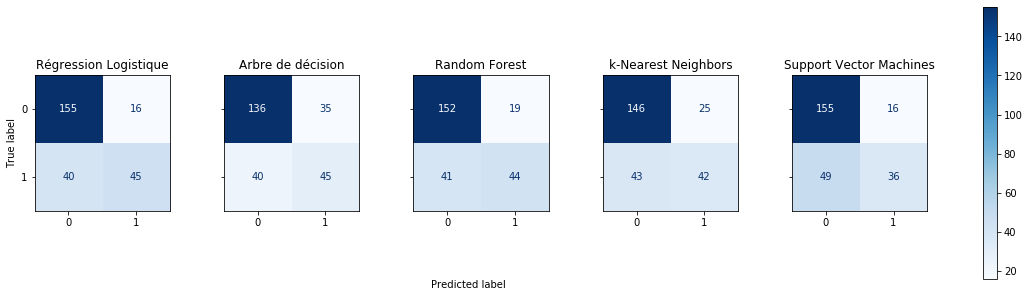

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot confusion matrix
f, axes = plt.subplots(1, len(models), figsize=(20, 5), sharey='row') # Creating subplots

for i, (key, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix,
                                  display_labels=['0','1']
                                 )
    disp.plot(ax=axes[i], cmap=plt.cm.Blues, values_format='d') # Color and format
    disp.ax_.set_title(key) # Title
    disp.im_.colorbar.remove() # Removing color bar
    disp.ax_.set_xlabel('') # Removing xlabel
    if i!=0:
        disp.ax_.set_ylabel('') # Removing ylabel except the first one

f.text(0.4, 0.1, 'Predicted label', ha='left') # Legend
plt.subplots_adjust(wspace=0.40, hspace=0.1)

f.colorbar(disp.im_, ax=axes)
plt.show()

Les matrices de confusion nous renseignent sur les TP, TN, FP et FN.
Ici, on voit que seulement 136 Vrai Négatif ont été correctement classés pour l'Arbre de décision, et que pour le Support Vector Machine il y a beaucoup de Faux Négatif (49).

Le jeu de données n'est pas très équilibré. En effet, il y a environ 500 individus sains pour 250 personnes diabétiques. Cela peut expliquer pourquoi les modèles arrivent mieux à classer les individus Négatifs.

### Courbe d'apprentissage

On trace maintenant les courbes d'apprentissage de chaque modèle, pour constater éventuellement des cas de sur-apprentissage ou sous-apprentissage.

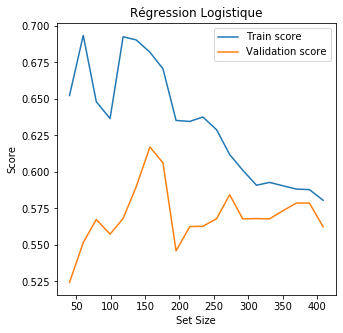

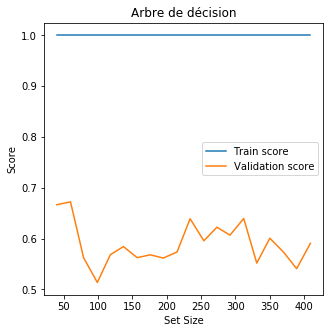

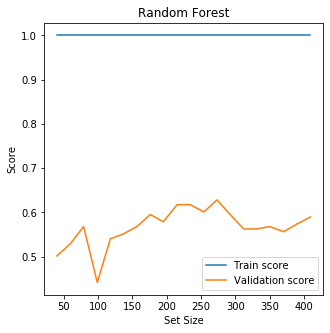

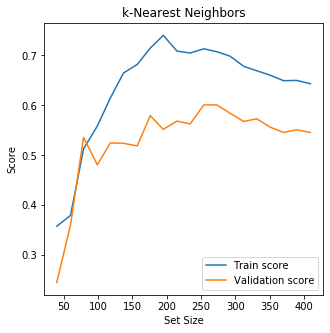

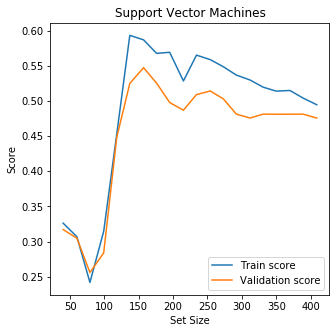

In [20]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(models):
    for key, value in models.items():
        N, train_score, val_score = learning_curve(value, X_train, y_train,
                                                   cv=5, scoring='recall',
                                                   train_sizes=np.linspace(0.1, 1, 20)
                                                  )
        plt.figure(figsize=(5, 5))
        plt.title(str(key))
        plt.plot(N, train_score.mean(axis=1), label='Train score')
        plt.plot(N, val_score.mean(axis=1), label='Validation score')
        plt.xlabel('Set Size')
        plt.ylabel('Score')
        plt.legend()

plot_learning_curve(models)

Pour les modèles Random Forest et Arbre de décision, on constate un sur-apprentissage (le score du Train set est bien supérieur au score du Validation set), et également pour les KNN, bien que le phénomène soit plus léger.

La régression logistique est en sur-apprentissage au début mais le problème se règle assez rapidement.

Enfin, pour le SVM, les prédictions sont plutôt correctes entre le Train set et Validation set.

## Optimisation des hyperparamètres pour Random Forest

Le modèle que l'on retient pour l'optimisation des hyperparamètres est Random Forest. Bien qu'il y est un problème d'overfitting, l'optimisation devrait résoudre le problème, en plus d'améliorer le score pour la métrique Recall.

In [21]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

print(model_RF.get_params()) # Tous les paramètres dans notre modèle Random Forest

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [22]:
# Dictionnaire des paramètres
param_RF = {
 'max_depth': range(15),
 'min_samples_leaf': range(15),
 'min_samples_split': range(15),
 'n_estimators': range(250)}

# Optimisation 
random_RF = RandomizedSearchCV(estimator = model_RF, 
                               param_distributions = param_RF, 
                               scoring='recall', cv=5, 
                               random_state=0, n_iter=20
                              )

random_RF.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [23]:
random_RF.best_score_, random_RF.best_params_

(0.5737237237237238,
 {'n_estimators': 48,
  'min_samples_split': 10,
  'min_samples_leaf': 3,
  'max_depth': 13})

Les meilleurs paramètres pour la Random Forest sont :
- n_estimators = 48 *(nombre d'arbres dans la forêt)*
- min_samples_split = 10 *(nombre minimum d'observations nécessaire pour séparer un noeud)*
- min_samples_leaf = 3 *(nombre minimum d'observations que l'on doit trouver aux feuilles d'un arbre)*
- max_depth = 13 *(profondeur maximale des arbres)*

Avec ces paramètres, le meilleur score Recall obtenu est de 57,37%.

### Courbe d'apprentissage Random Forest

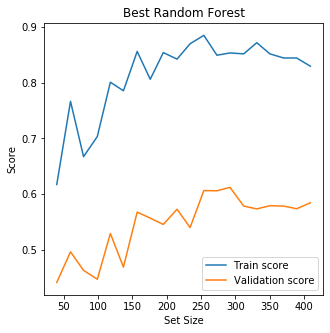

In [24]:
best_RF_dict = {'Best Random Forest' : random_RF.best_estimator_}
plot_learning_curve(best_RF_dict)

Ce graphique nous montre qu'il y a toujours un sur-apprentissage du modèle, mais nettement moins que précédement. Il faudrait, par conséquent, récolter plus de données pour réduire le sur-apprentissage.

## Perfomances 
### Courbe Precision-Recall

Etant donné qu'on a un dataset déséquilibré, on trace la courbe de Precision-Recall plutôt que la courbe ROC.

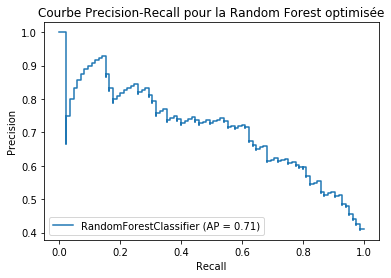

In [25]:
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(random_RF.best_estimator_, X_test, y_test)
plt.title('Courbe Precision-Recall pour la Random Forest optimisée')
plt.show()

### Métriques

In [26]:
from sklearn.metrics import recall_score, precision_score, f1_score

best_RF_pred = random_RF.best_estimator_.predict(X_test)
model_RF_pred = model_RF.predict(X_test)


print('Precision Random Forest optimisé :', precision_score(y_test, best_RF_pred))
print('Precision Random Forest de base :', precision_score(y_test, model_RF_pred))

print('\nF1 Score Random Forest optimisé :', f1_score(y_test, best_RF_pred))
print('F1 Score Random Forest de base :', f1_score(y_test, model_RF_pred))

print('\nRecall Random Forest optimisé :', recall_score(y_test, best_RF_pred))
print('Recall Random Forest de base :', recall_score(y_test, model_RF_pred))

print('\nMatrice de confusion du modèle optimisé \n', confusion_matrix(y_test, best_RF_pred))
print('\nMatrice de confusion du modèle de base \n', confusion_matrix(y_test, model_RF_pred))

Precision Random Forest optimisé : 0.7301587301587301
Precision Random Forest de base : 0.6984126984126984

F1 Score Random Forest optimisé : 0.6216216216216216
F1 Score Random Forest de base : 0.5945945945945945

Recall Random Forest optimisé : 0.5411764705882353
Recall Random Forest de base : 0.5176470588235295

Matrice de confusion du modèle optimisé 
 [[154  17]
 [ 39  46]]

Matrice de confusion du modèle de base 
 [[152  19]
 [ 41  44]]


On a réussi à gagner 3% sur le Recall (et en parallèle sur le Score F1 et la Precision) en optimisant le modèle Random Forest. Ce score pourrait être amélioré davatange en optimisant le modèle avec *GridSearchCV( )* qui crée tous les modèles possible pour nos valeurs de paramètres définis dans le dictionnaire "param_RF". Cependant cette fonction prend beaucoup de temps, c'est pourquoi on utilise ici *RandomizedSearchCV( )* qui est plus rapide car elle va rechercher aléatoirement les meilleurs hyperparamètres jusqu'à un nombre d'itération fixé (dans notre cas n_iter=20). Donc tous les paramètres dans le dictionnaire "param_RF" ne sont pas testés.

## Conclusion

En conclusion, avec le modèle Random Forest que nous venons d'optimiser, on obtient un score Recall de 54% sur le Test set. Cela signifie qu'on a 54% de chance de diagnostiquer qu'une personne est diabétique alors que celle-ci est bien atteinte du diabète. Toutefois, cela reste un score qui est faible.

Les résultats pourraient être améliorés en réalisant une meilleure optimisation des hyperparamètres, et aussi en s'occupant des variables ayant des valeurs égales à 0 telle que *BloodPressure* ou *SkinThickness*. En effet, cela a très certainement un impact sur l'apprentissage des modèles.
De plus, il faut également prendre en compte que le jeu de données est assez petit (768 oberservations), et le fait de créer un train et test set le rend encore plus petit. Les modèles n'ont pas énormément de données pour bien apprendre, et il faudrait donc en récolter davantage.